# Build the filters and data for the LAE/LBG templates project.


In [1]:
import os
import numpy as np
import fitsio
from astropy.table import Table
import astropy.units as u
from astropy.coordinates import SkyCoord
from speclite import filters as specfilters
import matplotlib.pyplot as plt

In [2]:
datadir = '/Users/ioannis/research/projects/fastspecfit/laelbg-templates'

In [3]:
def gather_cosmos2020_filters():
    """
    https://cosmos.astro.caltech.edu/page/filterset
    https://eazy-py.readthedocs.io/en/latest/eazy/filters.html
    https://github.com/cosmic-dawn/cosmos2020-readcat/blob/main/COSMOS2020_readcat.ipynb    
    
    GALEX_FUV - 120 CAPAK/galex1500.res FUV lambda_c= 1.5364e+03 AB-Vega= 2.128 w95=372.4  
    GALEX_NUV - 121 CAPAK/galex2500.res NUV lambda_c= 2.2992e+03 AB-Vega= 1.665 w95=925.3  
    CFHT_u - 348 CFHT_Megaprime.u_sdss.dat-cfh9302 lambda_c= 3.54017e+03  
    CFHT_ustar - 88 megaprime/cfht_mega_u_cfh9301.dat CFHT-LS+atm lambda_c= 3.8280e+03 AB-Vega= 0.325 w95=771.0  
    HSC_g - 314 g_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=4798.2 AB-Vega=-0.089  
    HSC_r - 315 r_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=6218.4 AB-Vega=0.223  
    HSC_i - 316 i_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=7727.0 AB-Vega=0.468  
    HSC_z - 317 z_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=8908.2 AB-Vega=0.522  
    HSC_y - 318 y_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=9775.1 AB-Vega=0.740  
    UVISTA_Y - 256 VISTA/Y_system+atmos.dat at80K_forETC+trans_10_10 lambda_c= 1.0217e+04 AB-Vega= 0.596 w95=1025.7  
    UVISTA_J - 257 VISTA/J_system+atmos.dat lambda_c= 1.2527e+04 AB-Vega= 0.911 w95=1703.1  
    UVISTA_H - 258 VISTA/H_system+atmos.dat lambda_c= 1.6433e+04 AB-Vega= 1.355 w95=2843.9  
    UVISTA_Ks - 259 VISTA/Ks_system+atmos.dat lambda_c= 2.1503e+04 AB-Vega= 1.819 w95=3108.7  
    SC_IB427 - 181 Subaru_MB/IA427.dat lambda_c= 4.2600e+03 AB-Vega=-0.161 w95=223.1  
    SC_IB464 - 183 Subaru_MB/IA464.dat lambda_c= 4.6333e+03 AB-Vega=-0.167 w95=237.8  
    SC_IA484 - 184 Subaru_MB/IA484.dat lambda_c= 4.8473e+03 AB-Vega=-0.037 w95=249.5  
    SC_IB505 - 185 Subaru_MB/IA505.dat lambda_c= 5.0608e+03 AB-Vega=-0.077 w95=259.0  
    SC_IA527 - 186 Subaru_MB/IA527.dat lambda_c= 5.2593e+03 AB-Vega=-0.035 w95=281.7  
    SC_IB574 - 188 Subaru_MB/IA574.dat lambda_c= 5.7629e+03 AB-Vega= 0.054 w95=303.3  
    SC_IA624 - 190 Subaru_MB/IA624.dat lambda_c= 6.2308e+03 AB-Vega= 0.142 w95=336.6  
    SC_IA679 - 192 Subaru_MB/IA679.dat lambda_c= 6.7816e+03 AB-Vega= 0.245 w95=371.9  
    SC_IB709 - 193 Subaru_MB/IA709.dat lambda_c= 7.0735e+03 AB-Vega= 0.287 w95=358.3  
    SC_IA738 - 194 Subaru_MB/IA738.dat lambda_c= 7.3595e+03 AB-Vega= 0.334 w95=355.0  
    SC_IA767 - 195 Subaru_MB/IA768.dat lambda_c= 7.6804e+03 AB-Vega= 0.387 w95=388.5  
    SC_IB827 - 197 Subaru_MB/IA827.dat lambda_c= 8.2468e+03 AB-Vega= 0.475 w95=367.0  
    SC_NB711 - 322 COSMOS/SUBARU_filter_NB711.txt lambda_c= 7.1202e+03 AB-Vega= xxxx  
    SC_NB816 - 84 COSMOS/SUBARU_filter_NB816.txt lambda_c= 8.1509e+03 AB-Vega= 0.461 w95=162.0  
    UVISTA_NB118 - 321 VISTA-NB118 atm lambda_c= 1.1909e+04 AB-Vega= xxxx  
    SC_B - 78 COSMOS/SUBARU_filter_B.txt lambda_c= 4.4480e+03 AB-Vega=-0.112 w95=1035.4  
    SC_gp - 80 COSMOS/SUBARU_filter_g.txt lambda_c= 4.7609e+03 AB-Vega=-0.101 w95=1317.6  
    SC_V - 79 COSMOS/SUBARU_filter_V.txt lambda_c= 5.4702e+03 AB-Vega=-0.000 w95=993.1  
    SC_rp - 116 CAPAK_v2/r_subaru.res cosmos-r lambda_c= 6.2755e+03 AB-Vega= 0.154 w95=1379.4  
    SC_ip - 117 CAPAK_v2/i_subaru.res cosmos-i lambda_c= 7.6712e+03 AB-Vega= 0.380 w95=1488.9  
    SC_zp - 118 CAPAK_v2/z_subaru.res cosmos-z lambda_c= 9.0282e+03 AB-Vega= 0.514 w95=1410.5  
    SC_zpp - 284 Subaru/suprime_FDCCD_z.res lambda_c= 9.0963e+03 AB-Vega=0.516 w95=1424.0  
    IRAC_CH1 - 18 IRAC/irac_tr1_2004-08-09.dat 3.6micron lambda_c= 3.5569e+04 AB-Vega= 2.781 w95=7139.2  
    IRAC_CH2 - 19 IRAC/irac_tr2_2004-08-09.dat 4.5micron lambda_c= 4.5020e+04 AB-Vega= 3.254 w95=9705.5  
    IRAC_CH3 - 20 IRAC/irac_tr3_2004-08-09.dat 5.8micron lambda_c= 5.7450e+04 AB-Vega= 3.747 w95=13590.7  
    IRAC_CH4 - 21 IRAC/irac_tr4_2004-08-09.dat 8.0micron lambda_c= 7.9158e+04 AB-Vega= 4.387 w95=27892.8      
    
    """
    # Filter names, mean wavelength, and other info (see Table 1 in Weaver+22)
    filt_name = ['GALEX_FUV', 'GALEX_NUV','CFHT_u','CFHT_ustar','HSC_g', 'HSC_r', 'HSC_i', 
                 'HSC_z', 'HSC_y', 'UVISTA_Y', 'UVISTA_J', 'UVISTA_H', 'UVISTA_Ks', 
                 'SC_IB427', 'SC_IB464', 'SC_IA484', 'SC_IB505', 'SC_IA527', 'SC_IB574', 
                 'SC_IA624', 'SC_IA679', 'SC_IB709', 'SC_IA738', 'SC_IA767', 'SC_IB827', 
                 'SC_NB711', 'SC_NB816', 'UVISTA_NB118', 'SC_B', 'SC_gp', 'SC_V', 'SC_rp', 
                 'SC_ip','SC_zp', 'SC_zpp', 'IRAC_CH1', 'IRAC_CH2', 'IRAC_CH3','IRAC_CH4']  
    
    eazy_filtnum = [120, 121, 348, 88, 314, 315, 316, 317, 318, 256, 257, 258, 259, 181, 
                    183, 184, 185, 186, 188, 190, 192, 193, 194, 195, 197, 322, 84, 321, 
                    78, 80, 79, 116, 117, 118, 284, 18, 19, 20, 21]
    
    filt_lambda = [0.1526, 0.2307, 0.3709, 0.3858, 0.4847, 0.6219, 0.7699, 0.8894, 0.9761, 
                   1.0216, 1.2525, 1.6466,2.1557, 0.4266, 0.4635, 0.4851, 0.5064, 0.5261, 
                   0.5766, 0.6232, 0.6780, 0.7073, 0.7361, 0.7694, 0.8243, 0.7121, 0.8150, 
                   1.1909, 0.4488, 0.4804, 0.5487, 0.6305, 0.7693, 0.8978, 0.9063, 3.5686, 
                   4.5067,5.7788,7.9958]
    
    filt_fwhm = [0.0224, 0.07909, 0.05181, 0.05976, 0.1383, 0.1547, 0.1471, 0.0766, 0.0786, 
                 0.0923, 0.1718, 0.2905, 0.3074, 0.02073, 0.02182, 0.02292, 0.0231, 0.02429, 
                 0.02729, 0.03004, 0.03363, 0.03163, 0.03235, 0.03648, 0.0343, 0.0072, 0.01198, 
                 0.01122, 0.0892, 0.1265, 0.0954, 0.1376, 0.1497, 0.0847, 0.1335, 0.7443, 1.0119, 
                 1.4082,2.8796] 
    
    AlambdaDivEBV = [8.31,8.742,4.807,4.674,3.69,2.715,2.0, 1.515, 1.298, 1.213, 0.874, 0.565, 
                     0.365,4.261,3.844,3.622,3.425,3.265,2.938,2.694,2.431,2.29,2.151, 1.997, 
                     1.748,2.268, 1.787, 0.946,4.041,3.738,3.128,2.673,2.003, 1.436, 1.466, 
                     0.163, 0.112, 0.075, 0.045]
    
    # photometric offsets (not available for all filters, see Table 3 in W+21)
    zpoff1 = [0.000, -0.352, -0.077, -0.023, 0.073, 0.101, 0.038, 0.036, 0.086, 0.054, # Farmer+LePhare
              0.017, -0.045, 0.000, -0.104, -0.044, -0.021, -0.018, -0.045, -0.084, 0.005, 
              0.166, -0.023, -0.034, -0.032, -0.069, -0.010, -0.064, 0.000, 0.000, 0.000, 
              0.000, 0.000, 0.000, 0.000, 0.000, -0.212, -0.219, 0.000, 0.000]  
    
    zpoff2 = [0.000, -0.029, -0.006, 0.053, 0.128, 0.127, 0.094, 0.084, 0.100, # Classic+LePhare
              0.049, 0.025, -0.044, 0.000, -0.013, -0.008, 0.022, 0.025, 0.033, 
              -0.032, 0.031, 0.208, -0.009, 0.003, -0.015, -0.001, 0.023, -0.021, 
              -0.017, -0.075, 0.000, 0.123, 0.035, 0.051, 0.000, 0.095, -0.087, 
              -0.111, 0.000, 0.000]  
    
    zpoff3 = [0.000, 0.000, -0.196, -0.054, 0.006, 0.090, 0.043, 0.071, 0.118, # Farmer+EAZY
              0.078, 0.047, -0.034, 0.000, -0.199, -0.129, -0.084, -0.073, 
              -0.087, -0.124, 0.004, 0.154, -0.022, -0.030, -0.013, -0.057, 
              0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 
              0.000, -0.102, -0.044, 0.000, 0.000] 
    zpoff4 = [0.000, 0.000, 0.000, -0.021, 0.055, 0.124, 0.121, 0.121, 0.145, # Classic+EAZY
              0.085, 0.057, -0.036, 0.000, -0.133, -0.098, -0.046, -0.037, -0.038, 
              -0.062, 0.038, 0.214, 0.024, 0.022, 0.01, 0.022, 0.000, 0.000, 0.00, 
              0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.021, 0.025, 0.000, 0.000] 
    #print(len(zpoff1), len(zpoff2), len(zpoff3), len(zpoff4))
    
    filtinfo = {filt_name[i]: (filt_lambda[i]*1e4, filt_fwhm[i]*1e4, AlambdaDivEBV[i],
                               [zpoff1[i], zpoff2[i], zpoff3[i], zpoff4[i]], eazy_filtnum[i]) 
                for i in range(len(filt_name))}
    
    return filtinfo

#filtinfo = gather_cosmos2020_filters()

In [4]:
def parse_cosmos2020(qa=False, verbose=False, catversion='Farmer'):
    """Parse the COSMOS2020 catalog.
    
    See https://github.com/cosmic-dawn/cosmos2020-readcat/blob/main/COSMOS2020_readcat.ipynb

    """
    catfile = datadir+'/COSMOS2020_{}_R1_v2.1_p3.fits'.format(catversion.upper())
    mask = fitsio.read(catfile, columns='FLAG_COMBINED')
    print('Read {:,d} objects from {}'.format(len(mask), catfile))

    I = np.where(mask == 0)[0]
    cat = Table(fitsio.read(catfile, rows=I))
    print('Trimmed to {:,d} objects in an unmasked region.'.format(len(I)))

    filtinfo = gather_cosmos2020_filters()
    
    if catversion == 'Farmer':
        fluxprefix = '_FLUX'  
        fluxerrprefix = '_FLUXERR'
    else:
        fluxprefix = '_FLUX_APER2'
        fluxerrprefix = '_FLUXERR_APER2'
        
    # apply photometric offsets
    offindx = 1 # Farmer + eazy
    
    for filt in filtinfo.keys():
        fluxcol = f'{filt}{fluxprefix}'
        fluxerrcol = f'{filt}{fluxerrprefix}'

        if verbose: 
            print(f'Applying photometric offset to {fluxcol}')
        offset = filtinfo[filt][3][offindx]
        
        if fluxcol in cat.colnames:
            cat[fluxcol] *= 10**(-0.4 * offset)
            cat[fluxerrcol] *= 10**(-0.4 * offset)
        else:
            print(f'Missing column {fluxcol}')
        
    outflx = 'uJy'
       
    return cat, filtinfo

cosmos, cosmosfilters = parse_cosmos2020(verbose=False)
cosmos[:3]

Read 964,506 objects from /Users/ioannis/research/projects/fastspecfit/laelbg-templates/COSMOS2020_FARMER_R1_v2.1_p3.fits
Trimmed to 746,976 objects in an unmasked region.
Missing column SC_B_FLUX
Missing column SC_gp_FLUX
Missing column SC_V_FLUX
Missing column SC_rp_FLUX
Missing column SC_ip_FLUX
Missing column SC_zp_FLUX
Missing column SC_zpp_FLUX


ID,ALPHA_J2000,DELTA_J2000,X_MODEL,Y_MODEL,ERRX_MODEL,ERRY_MODEL,ALPHA_DETECTION,DELTA_DETECTION,FARMER_ID,GROUP_ID,N_GROUP,MODEL_FLAG,SOLUTION_MODEL,FLAG_HSC,FLAG_SUPCAM,FLAG_UDEEP,FLAG_UVISTA,FLAG_COMBINED,EBV_MW,CFHT_u_FLUX,CFHT_u_FLUXERR,CFHT_u_MAG,CFHT_u_MAGERR,CFHT_u_CHISQ,CFHT_u_DRIFT,CFHT_u_VALID,CFHT_ustar_FLUX,CFHT_ustar_FLUXERR,CFHT_ustar_MAG,CFHT_ustar_MAGERR,CFHT_ustar_CHISQ,CFHT_ustar_DRIFT,CFHT_ustar_VALID,HSC_g_FLUX,HSC_g_FLUXERR,HSC_g_MAG,HSC_g_MAGERR,HSC_g_CHISQ,HSC_g_DRIFT,HSC_g_VALID,HSC_r_FLUX,HSC_r_FLUXERR,HSC_r_MAG,HSC_r_MAGERR,HSC_r_CHISQ,HSC_r_DRIFT,HSC_r_VALID,HSC_i_FLUX,HSC_i_FLUXERR,HSC_i_MAG,HSC_i_MAGERR,HSC_i_CHISQ,HSC_i_DRIFT,HSC_i_VALID,HSC_z_FLUX,HSC_z_FLUXERR,HSC_z_MAG,HSC_z_MAGERR,HSC_z_CHISQ,HSC_z_DRIFT,HSC_z_VALID,HSC_y_FLUX,HSC_y_FLUXERR,HSC_y_MAG,HSC_y_MAGERR,HSC_y_CHISQ,HSC_y_DRIFT,HSC_y_VALID,UVISTA_Y_FLUX,UVISTA_Y_FLUXERR,UVISTA_Y_MAG,UVISTA_Y_MAGERR,UVISTA_Y_CHISQ,UVISTA_Y_DRIFT,UVISTA_Y_VALID,UVISTA_J_FLUX,UVISTA_J_FLUXERR,UVISTA_J_MAG,UVISTA_J_MAGERR,UVISTA_J_CHISQ,UVISTA_J_DRIFT,UVISTA_J_VALID,UVISTA_H_FLUX,UVISTA_H_FLUXERR,UVISTA_H_MAG,UVISTA_H_MAGERR,UVISTA_H_CHISQ,UVISTA_H_DRIFT,UVISTA_H_VALID,UVISTA_Ks_FLUX,UVISTA_Ks_FLUXERR,UVISTA_Ks_MAG,UVISTA_Ks_MAGERR,UVISTA_Ks_CHISQ,UVISTA_Ks_DRIFT,UVISTA_Ks_VALID,UVISTA_NB118_FLUX,UVISTA_NB118_FLUXERR,UVISTA_NB118_MAG,UVISTA_NB118_MAGERR,UVISTA_NB118_CHISQ,UVISTA_NB118_DRIFT,UVISTA_NB118_VALID,SC_IB427_FLUX,SC_IB427_FLUXERR,SC_IB427_MAG,SC_IB427_MAGERR,SC_IB427_CHISQ,SC_IB427_DRIFT,SC_IB427_VALID,SC_IB464_FLUX,SC_IB464_FLUXERR,SC_IB464_MAG,SC_IB464_MAGERR,SC_IB464_CHISQ,SC_IB464_DRIFT,SC_IB464_VALID,SC_IA484_FLUX,SC_IA484_FLUXERR,SC_IA484_MAG,SC_IA484_MAGERR,SC_IA484_CHISQ,SC_IA484_DRIFT,SC_IA484_VALID,SC_IB505_FLUX,SC_IB505_FLUXERR,SC_IB505_MAG,SC_IB505_MAGERR,SC_IB505_CHISQ,SC_IB505_DRIFT,SC_IB505_VALID,SC_IA527_FLUX,SC_IA527_FLUXERR,SC_IA527_MAG,SC_IA527_MAGERR,SC_IA527_CHISQ,SC_IA527_DRIFT,SC_IA527_VALID,SC_IB574_FLUX,SC_IB574_FLUXERR,SC_IB574_MAG,SC_IB574_MAGERR,SC_IB574_CHISQ,SC_IB574_DRIFT,SC_IB574_VALID,SC_IA624_FLUX,SC_IA624_FLUXERR,SC_IA624_MAG,SC_IA624_MAGERR,SC_IA624_CHISQ,SC_IA624_DRIFT,SC_IA624_VALID,SC_IA679_FLUX,SC_IA679_FLUXERR,SC_IA679_MAG,SC_IA679_MAGERR,SC_IA679_CHISQ,SC_IA679_DRIFT,SC_IA679_VALID,SC_IB709_FLUX,SC_IB709_FLUXERR,SC_IB709_MAG,SC_IB709_MAGERR,SC_IB709_CHISQ,SC_IB709_DRIFT,SC_IB709_VALID,SC_IA738_FLUX,SC_IA738_FLUXERR,SC_IA738_MAG,SC_IA738_MAGERR,SC_IA738_CHISQ,SC_IA738_DRIFT,SC_IA738_VALID,SC_IA767_FLUX,SC_IA767_FLUXERR,SC_IA767_MAG,SC_IA767_MAGERR,SC_IA767_CHISQ,SC_IA767_DRIFT,SC_IA767_VALID,SC_IB827_FLUX,SC_IB827_FLUXERR,SC_IB827_MAG,SC_IB827_MAGERR,SC_IB827_CHISQ,SC_IB827_DRIFT,SC_IB827_VALID,SC_NB711_FLUX,SC_NB711_FLUXERR,SC_NB711_MAG,SC_NB711_MAGERR,SC_NB711_CHISQ,SC_NB711_DRIFT,SC_NB711_VALID,SC_NB816_FLUX,SC_NB816_FLUXERR,SC_NB816_MAG,SC_NB816_MAGERR,SC_NB816_CHISQ,SC_NB816_DRIFT,SC_NB816_VALID,IRAC_CH1_FLUX,IRAC_CH1_FLUXERR,IRAC_CH1_MAG,IRAC_CH1_MAGERR,IRAC_CH1_CHISQ,IRAC_CH1_DRIFT,IRAC_CH1_VALID,IRAC_CH2_FLUX,IRAC_CH2_FLUXERR,IRAC_CH2_MAG,IRAC_CH2_MAGERR,IRAC_CH2_CHISQ,IRAC_CH2_DRIFT,IRAC_CH2_VALID,IRAC_CH3_FLUX,IRAC_CH3_FLUXERR,IRAC_CH3_MAG,IRAC_CH3_MAGERR,IRAC_CH3_CHISQ,IRAC_CH3_DRIFT,IRAC_CH3_VALID,IRAC_CH4_FLUX,IRAC_CH4_FLUXERR,IRAC_CH4_MAG,IRAC_CH4_MAGERR,IRAC_CH4_CHISQ,IRAC_CH4_DRIFT,IRAC_CH4_VALID,ID_GALEX,GALEX_NUV_FLUX,GALEX_NUV_FLUXERR,GALEX_NUV_MAG,GALEX_NUV_MAGERR,GALEX_FUV_FLUX,GALEX_FUV_FLUXERR,GALEX_FUV_MAG,GALEX_FUV_MAGERR,ID_COSMOS2015,SPLASH_CH1_FLUX,SPLASH_CH1_FLUXERR,SPLASH_CH1_MAG,SPLASH_CH1_MAGERR,SPLASH_CH2_FLUX,SPLASH_CH2_FLUXERR,SPLASH_CH2_MAG,SPLASH_CH2_MAGERR,SPLASH_CH3_FLUX,SPLASH_CH3_FLUXERR,SPLASH_CH3_MAG,SPLASH_CH3_MAGERR,SPLASH_CH4_FLUX,SPLASH_CH4_FLUXERR,SPLASH_CH4_MAG,SPLASH_CH4_MAGERR,ID_ACS,ACS_F814W_MAG,ACS_F814W_MAGERR,ACS_F814W_FLUX,ACS_F814W_FLUXERR,ACS_A_WORLD,ACS_B_WORLD,ACS_THETA_WORLD,ACS_FWHM_WORLD,ACS_MU_MAX,ACS_MU_CLASS,ID_CHANDRA,ID_CLASSIC,lp_zBEST,lp_type,lp_zPDF,lp_zPDF_l68,lp_zPDF_u68,lp_zMinChi2,lp_chi2_best,lp_zp_2,lp_chi2_2,lp_NbFilt,lp_zq,lp

In [5]:
def parse_subaru(qa=False):
    """Parse the Subaru forced-photometry catalog.
    
    ### Subaru narrowband filters

    filts = ['IA427','IA464','IA484','IA505','IA527']  
    lamfilts = [4263.45, 4635.13, 4849.20, 5062.51, 5261.13]  
    lamstring= ['427','464','484','505','527']  
    widfilts = [195.805, 213.663, 222.029, 225.998, 245.700]  
    Avfilts = [4.202,3.894,3.694,3.490,3.304]
    
    IA427 - 181 Subaru_MB/IA427.dat lambda_c= 4.2600e+03 AB-Vega=-0.161 w95=223.1  
    IA464 - 183 Subaru_MB/IA464.dat lambda_c= 4.6333e+03 AB-Vega=-0.167 w95=237.8  
    IA484 - 184 Subaru_MB/IA484.dat lambda_c= 4.8473e+03 AB-Vega=-0.037 w95=249.5  
    IA505 - 185 Subaru_MB/IA505.dat lambda_c= 5.0608e+03 AB-Vega=-0.077 w95=259.0  
    IA527 - 186 Subaru_MB/IA527.dat lambda_c= 5.2593e+03 AB-Vega=-0.035 w95=281.7  

    ### Subaru broadband filters

    filts = ['g', 'r', 'i', 'z']  
    Av=[3.214, 2.165, 1.592, 1.211, 1.064]  

    HSC_g - 314 g_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=4798.2 AB-Vega=-0.089  
    HSC_r - 315 r_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=6218.4 AB-Vega=0.223  
    HSC_i - 316 i_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=7727.0 AB-Vega=0.468  
    HSC_z - 317 z_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=8908.2 AB-Vega=0.522  
    
    """
    catfile = datadir+'/Subaru_tractor_forced_all.fits'

    su = fitsio.read(catfile, columns=['brick_primary', 'maskbits', 'brightstarflag'])
    print('Read {:,d} objects from {}'.format(len(su), catfile))

    I = np.where((su['brick_primary']) & (su['maskbits'] == 0) & (su['brightstarflag'] == 0))[0]
    su = Table(fitsio.read(catfile, rows=I))#[:10]))
    print('Trimmed to {:,d} objects in an unmasked region.'.format(len(I)))
    
    # rename the intermediate-band columns
    for band in ['i_a_l427', 'i_a_l464', 'i_a_l484', 'i_a_l505', 'i_a_l527']:
        newband = band.replace('_', '').replace('ial', 'ia')
        #print(newband)
        su[f'flux_{newband}'] = su[f'flux_{band}']
        su[f'flux_ivar_{newband}'] = su[f'flux_ivar_{band}']
    
    # Rename the "forced_flux_[griz] columns.
    for band in ['g', 'z']:
        su[f'flux_{band}'] = su[f'forced_flux_{band}']
        su[f'flux_ivar_{band}'] = su[f'forced_flux_ivar_{band}']
    
    # There are two r- and i-band photometric measurements; take the ivar-weighted average.
    for band in ['r', 'i']:
        f1 = su[f'forced_flux_{band}'].data
        f2 = su[f'forced_flux_{band}2'].data
        i1 = su[f'forced_flux_ivar_{band}'].data
        i2 = su[f'forced_flux_ivar_{band}2'].data
        
        I = np.where(np.logical_or(i1 > 0, i2 > 0))[0]
        fnew = np.sum(i1[I, None] * f1[I, None] + i2[I, None] * f2[I, None], axis=1) / np.sum(i1[I, None] + i2[I, None], axis=1)
        inew = 1 / (1 / np.sum(i1[I, None] + i2[I, None], axis=1))

        if qa:
            B = (f1[I] > 0) * (f2[I] > 0) * (fnew > 0)
            fig, ax = plt.subplots(1, 2, figsize=(12, 4))
            ax[0].scatter(22.5-2.5*np.log10(fnew[B]), -2.5*np.log10(f1[I][B]/fnew[B]), 
                          alpha=0.5, s=1, label=band)
            ax[0].scatter(22.5-2.5*np.log10(fnew[B]), -2.5*np.log10(f2[I][B]/fnew[B]), 
                          alpha=0.5, s=1, label=f'{band}2')
            ax[0].set_ylim(-2, 2)
            ax[0].set_xlim(15, 32)
            ax[0].set_xlabel(f'Average {band} (AB mag)')
            ax[0].set_ylabel('$\Delta m$ (AB mag)')
            ax[0].legend(markerscale=5)
        
            _ = ax[1].hist(-2.5*np.log10(f1[I][B]/fnew[B]), alpha=0.5, bins=100, range=(-1,1), label=band)
            _ = ax[1].hist(-2.5*np.log10(f2[I][B]/fnew[B]), alpha=0.5, bins=100, range=(-1,1), label=f'{band}2')
            ax[1].set_ylabel('Number')
            ax[1].set_xlabel('$\Delta m$ (AB mag)')
            ax[1].legend()
            fig.tight_layout()

        su[f'flux_{band}'] = np.zeros_like(f1)
        su[f'flux_ivar_{band}'] = np.zeros_like(f1)

        su[f'flux_{band}'][I] = fnew
        su[f'flux_ivar_{band}'][I] = inew
        
    # gather filter info
    filtinfo = {}
    for band, eazynum in zip(['g', 'r', 'i', 'z', 'IB427', 'IB464', 'IB484', 'IB505', 'IB527'],
                             [314, 315, 316, 317, 181, 183, 184, 185, 186]):
        filtinfo[band] = [eazynum]
        
    return su, filtinfo

Read 729,081 objects from /Users/ioannis/research/projects/fastspecfit/laelbg-templates/Subaru_tractor_forced_all.fits
Trimmed to 531,823 objects in an unmasked region.


release,brickid,brickname,objid,brick_primary,maskbits,fitbits,type,ra,dec,ra_ivar,dec_ivar,bx,by,dchisq,ebv,mjd_min,mjd_max,ref_cat,ref_id,pmra,pmdec,parallax,pmra_ivar,pmdec_ivar,parallax_ivar,ref_epoch,gaia_phot_g_mean_mag,gaia_phot_g_mean_flux_over_error,gaia_phot_g_n_obs,gaia_phot_bp_mean_mag,gaia_phot_bp_mean_flux_over_error,gaia_phot_bp_n_obs,gaia_phot_rp_mean_mag,gaia_phot_rp_mean_flux_over_error,gaia_phot_rp_n_obs,gaia_phot_variable_flag,gaia_astrometric_excess_noise,gaia_astrometric_excess_noise_sig,gaia_astrometric_n_obs_al,gaia_astrometric_n_good_obs_al,gaia_astrometric_weight_al,gaia_duplicated_source,gaia_a_g_val,gaia_e_bp_min_rp_val,gaia_phot_bp_rp_excess_factor,gaia_astrometric_sigma5d_max,gaia_astrometric_params_solved,flux_i_a_l427,flux_i_a_l464,flux_i_a_l484,flux_i_a_l505,flux_i_a_l527,flux_ivar_i_a_l427,flux_ivar_i_a_l464,flux_ivar_i_a_l484,flux_ivar_i_a_l505,flux_ivar_i_a_l527,fiberflux_i_a_l427,fiberflux_i_a_l464,fiberflux_i_a_l484,fiberflux_i_a_l505,fiberflux_i_a_l527,fibertotflux_i_a_l427,fibertotflux_i_a_l464,fibertotflux_i_a_l484,fibertotflux_i_a_l505,fibertotflux_i_a_l527,apflux_i_a_l427,apflux_i_a_l464,apflux_i_a_l484,apflux_i_a_l505,apflux_i_a_l527,apflux_resid_i_a_l427,apflux_resid_i_a_l464,apflux_resid_i_a_l484,apflux_resid_i_a_l505,apflux_resid_i_a_l527,apflux_blobresid_i_a_l427,apflux_blobresid_i_a_l464,apflux_blobresid_i_a_l484,apflux_blobresid_i_a_l505,apflux_blobresid_i_a_l527,apflux_ivar_i_a_l427,apflux_ivar_i_a_l464,apflux_ivar_i_a_l484,apflux_ivar_i_a_l505,apflux_ivar_i_a_l527,apflux_masked_i_a_l427,apflux_masked_i_a_l464,apflux_masked_i_a_l484,apflux_masked_i_a_l505,apflux_masked_i_a_l527,nobs_i_a_l427,nobs_i_a_l464,nobs_i_a_l484,nobs_i_a_l505,nobs_i_a_l527,rchisq_i_a_l427,rchisq_i_a_l464,rchisq_i_a_l484,rchisq_i_a_l505,rchisq_i_a_l527,fracflux_i_a_l427,fracflux_i_a_l464,fracflux_i_a_l484,fracflux_i_a_l505,fracflux_i_a_l527,fracmasked_i_a_l427,fracmasked_i_a_l464,fracmasked_i_a_l484,fracmasked_i_a_l505,fracmasked_i_a_l527,fracin_i_a_l427,fracin_i_a_l464,fracin_i_a_l484,fracin_i_a_l505,fracin_i_a_l527,ngood_i_a_l427,ngood_i_a_l464,ngood_i_a_l484,ngood_i_a_l505,ngood_i_a_l527,anymask_i_a_l427,anymask_i_a_l464,anymask_i_a_l484,anymask_i_a_l505,anymask_i_a_l527,allmask_i_a_l427,allmask_i_a_l464,allmask_i_a_l484,allmask_i_a_l505,allmask_i_a_l527,psfsize_i_a_l427,psfsize_i_a_l464,psfsize_i_a_l484,psfsize_i_a_l505,psfsize_i_a_l527,psfdepth_i_a_l427,psfdepth_i_a_l464,psfdepth_i_a_l484,psfdepth_i_a_l505,psfdepth_i_a_l527,galdepth_i_a_l427,galdepth_i_a_l464,galdepth_i_a_l484,galdepth_i_a_l505,galdepth_i_a_l527,nea_i_a_l427,nea_i_a_l464,nea_i_a_l484,nea_i_a_l505,nea_i_a_l527,blob_nea_i_a_l427,blob_nea_i_a_l464,blob_nea_i_a_l484,blob_nea_i_a_l505,blob_nea_i_a_l527,sersic,sersic_ivar,shape_r,shape_r_ivar,shape_e1,shape_e1_ivar,shape_e2,shape_e2_ivar,forced_flux_g,forced_flux_ivar_g,forced_apflux_g,forced_apflux_ivar_g,forced_psfdepth_g,forced_galdepth_g,forced_nexp_g,forced_flux_i,forced_flux_ivar_i,forced_apflux_i,forced_apflux_ivar_i,forced_psfdepth_i,forced_galdepth_i,forced_nexp_i,forced_flux_i2,forced_flux_ivar_i2,forced_apflux_i2,forced_apflux_ivar_i2,forced_psfdepth_i2,forced_galdepth_i2,forced_nexp_i2,forced_flux_r,forced_flux_ivar_r,forced_apflux_r,forced_apflux_ivar_r,forced_psfdepth_r,forced_galdepth_r,forced_nexp_r,forced_flux_r2,forced_flux_ivar_r2,forced_apflux_r2,forced_apflux_ivar_r2,forced_psfdepth_r2,forced_galdepth_r2,forced_nexp_r2,forced_flux_z,forced_flux_ivar_z,forced_apflux_z,forced_apflux_ivar_z,forced_psfdepth_z,forced_galdepth_z,forced_nexp_z,brightstarflag,flux_ia427,flux_ivar_ia427,flux_ia464,flux_ivar_ia464,flux_ia484,flux_ivar_ia484,flux_ia505,flux_ivar_ia505,flux_ia527,flux_ivar_ia527,flux_g,flux_ivar_g,flux_z,flux_ivar_z,flux_r,flux_ivar_r,flux_i,flux_ivar_i
int16,int32,str8,int32,bool,int32,int16,str3,float64,float64,float32,float32,float32,float32,float32[5],float32,float64,float64,str2,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,in

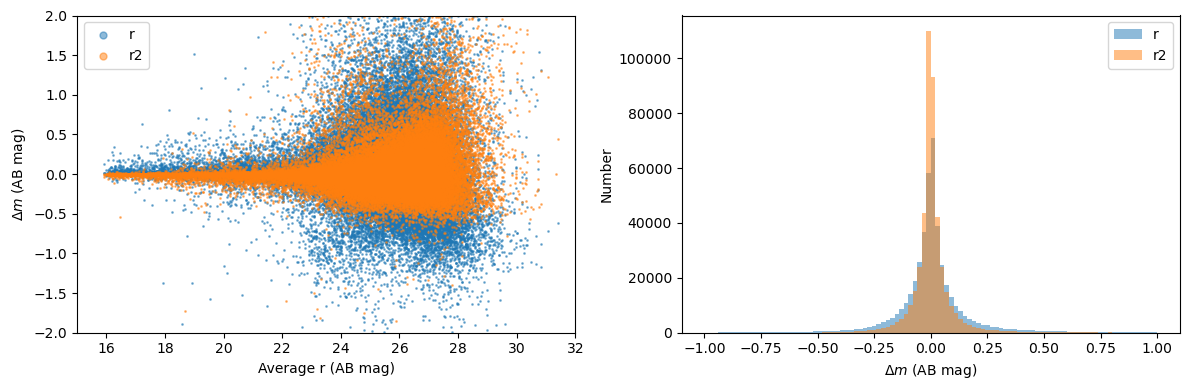

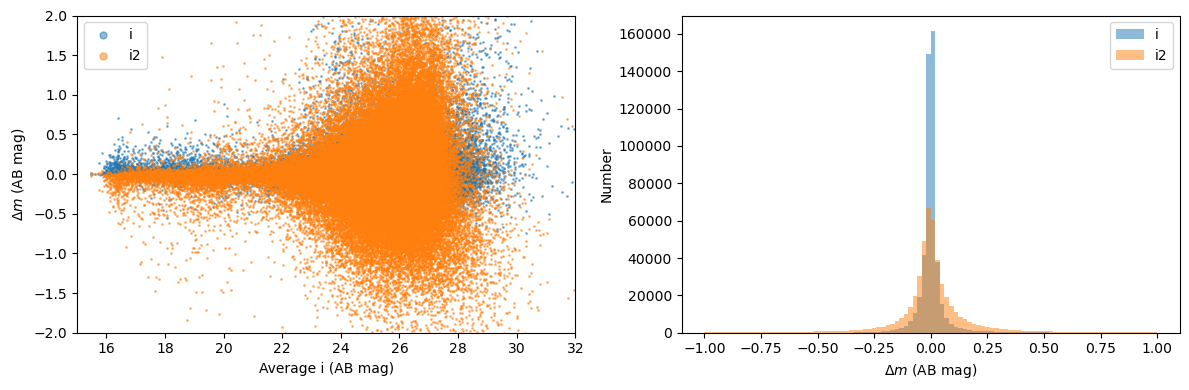

In [6]:
subaru, subarufilters = parse_subaru(qa=True)
#su['ra', 'dec', 'type', 'flux_g', 'flux_r', 'flux_i', 'flux_z', 'flux_ivar_g', 'flux_ivar_r', 'flux_ivar_i', 'flux_ivar_z']
subaru

In [109]:
print(subaru.colnames)

['release', 'brickid', 'brickname', 'objid', 'brick_primary', 'maskbits', 'fitbits', 'type', 'ra', 'dec', 'ra_ivar', 'dec_ivar', 'bx', 'by', 'dchisq', 'ebv', 'mjd_min', 'mjd_max', 'ref_cat', 'ref_id', 'pmra', 'pmdec', 'parallax', 'pmra_ivar', 'pmdec_ivar', 'parallax_ivar', 'ref_epoch', 'gaia_phot_g_mean_mag', 'gaia_phot_g_mean_flux_over_error', 'gaia_phot_g_n_obs', 'gaia_phot_bp_mean_mag', 'gaia_phot_bp_mean_flux_over_error', 'gaia_phot_bp_n_obs', 'gaia_phot_rp_mean_mag', 'gaia_phot_rp_mean_flux_over_error', 'gaia_phot_rp_n_obs', 'gaia_phot_variable_flag', 'gaia_astrometric_excess_noise', 'gaia_astrometric_excess_noise_sig', 'gaia_astrometric_n_obs_al', 'gaia_astrometric_n_good_obs_al', 'gaia_astrometric_weight_al', 'gaia_duplicated_source', 'gaia_a_g_val', 'gaia_e_bp_min_rp_val', 'gaia_phot_bp_rp_excess_factor', 'gaia_astrometric_sigma5d_max', 'gaia_astrometric_params_solved', 'flux_i_a_l427', 'flux_i_a_l464', 'flux_i_a_l484', 'flux_i_a_l505', 'flux_i_a_l527', 'flux_ivar_i_a_l427', 'f

### Match to the various merged-tertiary?? files

In [113]:
def match_phot_to_desi(phot, racolumn='ra', deccolumn='dec', rad=1., 
                       label='Tractor - Subaru/HSC', title='COSMOS',
                       outprefix=''):
    """
    https://data.desi.lbl.gov/desi/survey/fiberassign/special/tertiary/0026/tertiary-config-0026.yaml

    """
    from astropy.table import Column
    
    mergefiles = [datadir+'/merge-tertiary26-thru20230416.fits']
    for mergefile in mergefiles:
        
        tertiary = os.path.basename(mergefile).split('-')[1]
        suffix = '-'.join(os.path.basename(mergefile).split('-')[1:])
        
        desi = Table(fitsio.read(mergefile))
        ndesi = len(desi)
        print('Read {:,d} DESI targets from {}'.format(ndesi, mergefile))
        
        c_desi = SkyCoord(ra=desi['TARGET_RA']*u.deg, dec=desi['TARGET_DEC']*u.deg)
        c_phot = SkyCoord(ra=phot[racolumn]*u.deg, dec=phot[deccolumn]*u.deg)
        
        #_, sep2d, _ = c_phot.match_to_catalog_sky(c_desi)
        #plt.hist(sep2d.arcsec, bins=100)
        
        indx_phot, d2d, _ = c_desi.match_to_catalog_sky(c_phot)
        indx_desi = np.where(d2d.arcsec < rad)[0]
        indx_phot = indx_phot[indx_desi]
        print('Matched photometry for {:,d} DESI targets.'.format(len(indx_desi)))
        
        #indx_desi, indx_phot, d2d, _ = c_phot.search_around_sky(c_desi, rad*u.arcsec)
        #indx_miss_desi = np.delete(np.arange(len(desi)), indx_desi)

        fig, ax = plt.subplots(figsize=(5, 5))
        ax.scatter(desi['TARGET_RA'], desi['TARGET_DEC'], s=1, zorder=0,
                   marker='o', color='k', alpha=0.5, label='DESI-{} (all, N={:,d})'.format(tertiary, len(desi)))
        ax.scatter(phot[racolumn], phot[deccolumn], s=1, zorder=1,
                   marker='o', color='orange', alpha=0.7, label='{} (all, N={:,d})'.format(label, len(phot)))
        ax.scatter(desi['TARGET_RA'][indx_desi], desi['TARGET_DEC'][indx_desi], s=1, zorder=2,
                   marker='s', color='blue', alpha=0.7, label='DESI-{} (N={:,d} matches)'.format(tertiary, len(indx_desi)))
        ax.set_title(title)
        ax.set_xlabel('RA')
        ax.set_ylabel('Dec')
        ax.legend(markerscale=5, loc='lower right')
        fig.tight_layout()
        
        outfile = datadir+'/'+outprefix+'-'+suffix
        #outfile = datadir+'/'+os.path.basename(mergefile).replace('.fits', '-'+outprefix+'.fits')
        
        out = Table()
        out['TARGETID'] = desi['TARGETID']
        for col in phot.colnames:
            if phot[col].ndim > 1:
                out[col.upper()] = np.zeros(shape=(ndesi, phot[col].shape[1]), dtype=phot[col].dtype)
                out[col.upper()][indx_desi, :] = phot[col][indx_phot, :]
            else:
                out[col.upper()] = np.zeros(ndesi, dtype=phot[col].dtype)              
                out[col.upper()][indx_desi] = phot[col][indx_phot]

        print('Wrote {:,d} objects to {}'.format(len(out), outfile))
        out.write(outfile, overwrite=True)

        return phot[indx_phot], desi[indx_desi]#, desi[indx_miss_desi]

Read 21,561 DESI targets from /Users/ioannis/research/projects/fastspecfit/laelbg-templates/merge-tertiary26-thru20230416.fits
Matched photometry for 2,504 DESI targets.
Wrote 21,561 objects to /Users/ioannis/research/projects/fastspecfit/laelbg-templates/cosmos2020-tertiary26-thru20230416.fits


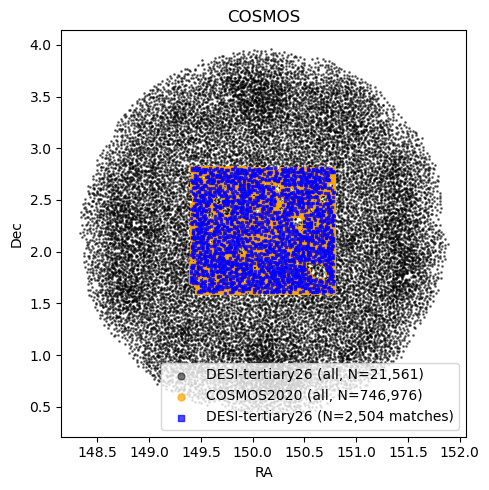

In [114]:
dcosmos, desicosmos = match_phot_to_desi(cosmos, racolumn='ALPHA_J2000', deccolumn='DELTA_J2000', 
                                         label='COSMOS2020', title='COSMOS', outprefix='cosmos2020')

Read 21,561 DESI targets from /Users/ioannis/research/projects/fastspecfit/laelbg-templates/merge-tertiary26-thru20230416.fits
Matched photometry for 3,820 DESI targets.
Wrote 21,561 objects to /Users/ioannis/research/projects/fastspecfit/laelbg-templates/subaru-tractor-tertiary26-thru20230416.fits


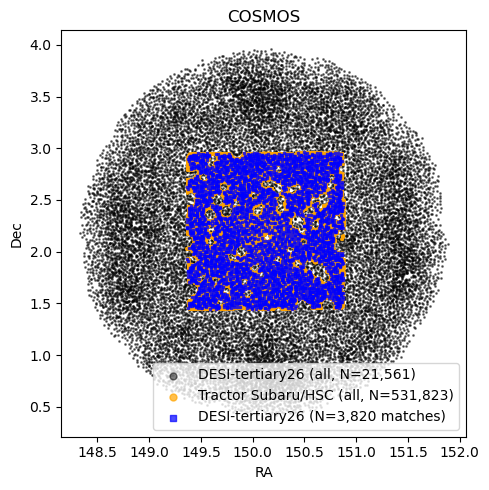

In [115]:
dsubaru, desisubaru = match_phot_to_desi(subaru, racolumn='ra', deccolumn='dec', 
                                         label='Tractor Subaru/HSC', title='COSMOS',
                                         outprefix='subaru-tractor')

In [116]:
bb = Table(fitsio.read('/Users/ioannis/research/projects/fastspecfit/laelbg-templates/subaru-tractor-tertiary26-thru20230416.fits'))
bb

TARGETID,RELEASE,BRICKID,BRICKNAME,OBJID,BRICK_PRIMARY,MASKBITS,FITBITS,TYPE,RA,DEC,RA_IVAR,DEC_IVAR,BX,BY,DCHISQ,EBV,MJD_MIN,MJD_MAX,REF_CAT,REF_ID,PMRA,PMDEC,PARALLAX,PMRA_IVAR,PMDEC_IVAR,PARALLAX_IVAR,REF_EPOCH,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_G_N_OBS,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_N_OBS,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_N_OBS,GAIA_PHOT_VARIABLE_FLAG,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_ASTROMETRIC_EXCESS_NOISE_SIG,GAIA_ASTROMETRIC_N_OBS_AL,GAIA_ASTROMETRIC_N_GOOD_OBS_AL,GAIA_ASTROMETRIC_WEIGHT_AL,GAIA_DUPLICATED_SOURCE,GAIA_A_G_VAL,GAIA_E_BP_MIN_RP_VAL,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,FLUX_I_A_L427,FLUX_I_A_L464,FLUX_I_A_L484,FLUX_I_A_L505,FLUX_I_A_L527,FLUX_IVAR_I_A_L427,FLUX_IVAR_I_A_L464,FLUX_IVAR_I_A_L484,FLUX_IVAR_I_A_L505,FLUX_IVAR_I_A_L527,FIBERFLUX_I_A_L427,FIBERFLUX_I_A_L464,FIBERFLUX_I_A_L484,FIBERFLUX_I_A_L505,FIBERFLUX_I_A_L527,FIBERTOTFLUX_I_A_L427,FIBERTOTFLUX_I_A_L464,FIBERTOTFLUX_I_A_L484,FIBERTOTFLUX_I_A_L505,FIBERTOTFLUX_I_A_L527,APFLUX_I_A_L427,APFLUX_I_A_L464,APFLUX_I_A_L484,APFLUX_I_A_L505,APFLUX_I_A_L527,APFLUX_RESID_I_A_L427,APFLUX_RESID_I_A_L464,APFLUX_RESID_I_A_L484,APFLUX_RESID_I_A_L505,APFLUX_RESID_I_A_L527,APFLUX_BLOBRESID_I_A_L427,APFLUX_BLOBRESID_I_A_L464,APFLUX_BLOBRESID_I_A_L484,APFLUX_BLOBRESID_I_A_L505,APFLUX_BLOBRESID_I_A_L527,APFLUX_IVAR_I_A_L427,APFLUX_IVAR_I_A_L464,APFLUX_IVAR_I_A_L484,APFLUX_IVAR_I_A_L505,APFLUX_IVAR_I_A_L527,APFLUX_MASKED_I_A_L427,APFLUX_MASKED_I_A_L464,APFLUX_MASKED_I_A_L484,APFLUX_MASKED_I_A_L505,APFLUX_MASKED_I_A_L527,NOBS_I_A_L427,NOBS_I_A_L464,NOBS_I_A_L484,NOBS_I_A_L505,NOBS_I_A_L527,RCHISQ_I_A_L427,RCHISQ_I_A_L464,RCHISQ_I_A_L484,RCHISQ_I_A_L505,RCHISQ_I_A_L527,FRACFLUX_I_A_L427,FRACFLUX_I_A_L464,FRACFLUX_I_A_L484,FRACFLUX_I_A_L505,FRACFLUX_I_A_L527,FRACMASKED_I_A_L427,FRACMASKED_I_A_L464,FRACMASKED_I_A_L484,FRACMASKED_I_A_L505,FRACMASKED_I_A_L527,FRACIN_I_A_L427,FRACIN_I_A_L464,FRACIN_I_A_L484,FRACIN_I_A_L505,FRACIN_I_A_L527,NGOOD_I_A_L427,NGOOD_I_A_L464,NGOOD_I_A_L484,NGOOD_I_A_L505,NGOOD_I_A_L527,ANYMASK_I_A_L427,ANYMASK_I_A_L464,ANYMASK_I_A_L484,ANYMASK_I_A_L505,ANYMASK_I_A_L527,ALLMASK_I_A_L427,ALLMASK_I_A_L464,ALLMASK_I_A_L484,ALLMASK_I_A_L505,ALLMASK_I_A_L527,PSFSIZE_I_A_L427,PSFSIZE_I_A_L464,PSFSIZE_I_A_L484,PSFSIZE_I_A_L505,PSFSIZE_I_A_L527,PSFDEPTH_I_A_L427,PSFDEPTH_I_A_L464,PSFDEPTH_I_A_L484,PSFDEPTH_I_A_L505,PSFDEPTH_I_A_L527,GALDEPTH_I_A_L427,GALDEPTH_I_A_L464,GALDEPTH_I_A_L484,GALDEPTH_I_A_L505,GALDEPTH_I_A_L527,NEA_I_A_L427,NEA_I_A_L464,NEA_I_A_L484,NEA_I_A_L505,NEA_I_A_L527,BLOB_NEA_I_A_L427,BLOB_NEA_I_A_L464,BLOB_NEA_I_A_L484,BLOB_NEA_I_A_L505,BLOB_NEA_I_A_L527,SERSIC,SERSIC_IVAR,SHAPE_R,SHAPE_R_IVAR,SHAPE_E1,SHAPE_E1_IVAR,SHAPE_E2,SHAPE_E2_IVAR,FORCED_FLUX_G,FORCED_FLUX_IVAR_G,FORCED_APFLUX_G,FORCED_APFLUX_IVAR_G,FORCED_PSFDEPTH_G,FORCED_GALDEPTH_G,FORCED_NEXP_G,FORCED_FLUX_I,FORCED_FLUX_IVAR_I,FORCED_APFLUX_I,FORCED_APFLUX_IVAR_I,FORCED_PSFDEPTH_I,FORCED_GALDEPTH_I,FORCED_NEXP_I,FORCED_FLUX_I2,FORCED_FLUX_IVAR_I2,FORCED_APFLUX_I2,FORCED_APFLUX_IVAR_I2,FORCED_PSFDEPTH_I2,FORCED_GALDEPTH_I2,FORCED_NEXP_I2,FORCED_FLUX_R,FORCED_FLUX_IVAR_R,FORCED_APFLUX_R,FORCED_APFLUX_IVAR_R,FORCED_PSFDEPTH_R,FORCED_GALDEPTH_R,FORCED_NEXP_R,FORCED_FLUX_R2,FORCED_FLUX_IVAR_R2,FORCED_APFLUX_R2,FORCED_APFLUX_IVAR_R2,FORCED_PSFDEPTH_R2,FORCED_GALDEPTH_R2,FORCED_NEXP_R2,FORCED_FLUX_Z,FORCED_FLUX_IVAR_Z,FORCED_APFLUX_Z,FORCED_APFLUX_IVAR_Z,FORCED_PSFDEPTH_Z,FORCED_GALDEPTH_Z,FORCED_NEXP_Z,BRIGHTSTARFLAG,FLUX_IA427,FLUX_IVAR_IA427,FLUX_IA464,FLUX_IVAR_IA464,FLUX_IA484,FLUX_IVAR_IA484,FLUX_IA505,FLUX_IVAR_IA505,FLUX_IA527,FLUX_IVAR_IA527,FLUX_G,FLUX_IVAR_G,FLUX_Z,FLUX_IVAR_Z,FLUX_R,FLUX_IVAR_R,FLUX_I,FLUX_IVAR_I
int64,int16,int32,str8,int32,bool,int32,int16,str3,float64,float64,float32,float32,float32,float32,float32[5],float32,float64,float64,str2,int64,float32,float32,float32,float32,float32,float32,float32,flo

In [98]:
def write_speclite_filters(infilters, group_name='tmp'):
    """Write the eazy filters into speclite format.
    
    https://eazy-py.readthedocs.io/en/latest/eazy/filters.html
    https://speclite.readthedocs.io/en/latest/filters.html
    
    """
    import eazy
    import astropy.units as u
    from astropy.table import Table
    from speclite import filters as specfilters

    res = eazy.filters.FilterFile(os.path.join(eazy.utils.path_to_eazy_data(),
                                  'filters/FILTER.RES.latest'))
    
    filtfiles = []
    for filt in infilters.keys():
        T = Table()
        
        wave = np.array(res[infilters[filt][-1]].wave)
        resp = np.array(res[infilters[filt][-1]].throughput)
        wave = np.hstack([np.min(wave)-0.1, wave, np.max(wave)+0.1])
        resp = np.hstack([0.0, resp, 0.0])
        
        meta = dict(group_name=group_name, band_name=f'{filt}')
        ff = specfilters.FilterResponse(wavelength=wave * u.Angstrom,
                                        response=resp, meta=meta)
        
        filtfile = f'{group_name}-{filt}.ecsv'
        filtfiles.append(filtfile)

        ff.save('./')
        #print(filtfile)
        #ff.save(datadir)
        #print(datadir+'/'+filtfile)
        
        #specfilters.plot_filters(filt)#, wavelength_limits=(3500, 6200), cmap='jet')
    #print(np.array(filtfiles))

#### The HSC filters (hsc2017) are already in speclite but we need the intermediate-band filters.

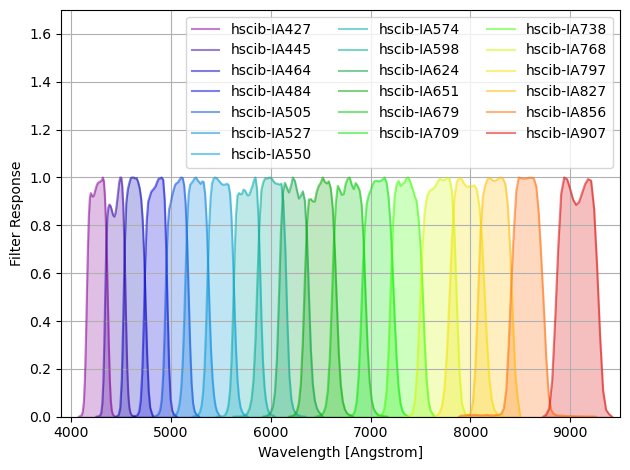

In [32]:
filtinfo = {}
for band, eazynum in zip(['IA427', 'IA445', 'IA464', 'IA484', 'IA505', 'IA527', 
                          'IA550', 'IA574', 'IA598', 'IA624', 'IA651', 'IA679', 
                          'IA709', 'IA738', 'IA768', 'IA797', 'IA827', 'IA856', 'IA907'],
                          [181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 
                           191, 192, 193, 194, 195, 196, 197, 198, 199]):
    filtinfo[band] = [eazynum]
    
#write_speclite_filters(filtinfo, group_name='hscib')
filt = specfilters.load_filters('hscib-IA427', 'hscib-IA445', 'hscib-IA464', 'hscib-IA484', 'hscib-IA505', 
                                'hscib-IA527', 'hscib-IA550', 'hscib-IA574', 'hscib-IA598', 'hscib-IA624',
                                'hscib-IA651', 'hscib-IA679', 'hscib-IA709', 'hscib-IA738', 'hscib-IA768',
                                'hscib-IA797', 'hscib-IA827', 'hscib-IA856', 'hscib-IA907')
specfilters.plot_filters(filt, wavelength_limits=(3900, 9500), 
                         response_limits=(0, 1.7), legend_ncols=3,
                         legend_loc='upper right')
plt.tight_layout()
plt.savefig('hscib.png')

    GALEX_FUV - 120 CAPAK/galex1500.res FUV lambda_c= 1.5364e+03 AB-Vega= 2.128 w95=372.4  
    GALEX_NUV - 121 CAPAK/galex2500.res NUV lambda_c= 2.2992e+03 AB-Vega= 1.665 w95=925.3  
    CFHT_u - 348 CFHT_Megaprime.u_sdss.dat-cfh9302 lambda_c= 3.54017e+03  
    CFHT_ustar - 88 megaprime/cfht_mega_u_cfh9301.dat CFHT-LS+atm lambda_c= 3.8280e+03 AB-Vega= 0.325 w95=771.0  
    HSC_g - 314 g_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=4798.2 AB-Vega=-0.089  
    HSC_r - 315 r_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=6218.4 AB-Vega=0.223  
    HSC_i - 316 i_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=7727.0 AB-Vega=0.468  
    HSC_z - 317 z_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=8908.2 AB-Vega=0.522  
    HSC_y - 318 y_HSC.txt http://cosmos.astro.caltech.edu/page/filterset lambda_c=9775.1 AB-Vega=0.740  
    UVISTA_Y - 256 VISTA/Y_system+atmos.dat at80K_forETC+trans_10_10 lambda_c= 1.0217e+04 AB-Vega= 0.596 w95=1025.7  
    UVISTA_J - 257 VISTA/J_system+atmos.dat lambda_c= 1.2527e+04 AB-Vega= 0.911 w95=1703.1  
    UVISTA_H - 258 VISTA/H_system+atmos.dat lambda_c= 1.6433e+04 AB-Vega= 1.355 w95=2843.9  
    UVISTA_Ks - 259 VISTA/Ks_system+atmos.dat lambda_c= 2.1503e+04 AB-Vega= 1.819 w95=3108.7  
    SC_NB711 - 322 COSMOS/SUBARU_filter_NB711.txt lambda_c= 7.1202e+03 AB-Vega= xxxx  
    SC_NB816 - 84 COSMOS/SUBARU_filter_NB816.txt lambda_c= 8.1509e+03 AB-Vega= 0.461 w95=162.0  
    UVISTA_NB118 - 321 VISTA-NB118 atm lambda_c= 1.1909e+04 AB-Vega= xxxx  
    SC_B - 78 COSMOS/SUBARU_filter_B.txt lambda_c= 4.4480e+03 AB-Vega=-0.112 w95=1035.4  
    SC_gp - 80 COSMOS/SUBARU_filter_g.txt lambda_c= 4.7609e+03 AB-Vega=-0.101 w95=1317.6  
    SC_V - 79 COSMOS/SUBARU_filter_V.txt lambda_c= 5.4702e+03 AB-Vega=-0.000 w95=993.1  
    SC_rp - 116 CAPAK_v2/r_subaru.res cosmos-r lambda_c= 6.2755e+03 AB-Vega= 0.154 w95=1379.4  
    SC_ip - 117 CAPAK_v2/i_subaru.res cosmos-i lambda_c= 7.6712e+03 AB-Vega= 0.380 w95=1488.9  
    SC_zp - 118 CAPAK_v2/z_subaru.res cosmos-z lambda_c= 9.0282e+03 AB-Vega= 0.514 w95=1410.5  
    SC_zpp - 284 Subaru/suprime_FDCCD_z.res lambda_c= 9.0963e+03 AB-Vega=0.516 w95=1424.0  
    IRAC_CH1 - 18 IRAC/irac_tr1_2004-08-09.dat 3.6micron lambda_c= 3.5569e+04 AB-Vega= 2.781 w95=7139.2  
    IRAC_CH2 - 19 IRAC/irac_tr2_2004-08-09.dat 4.5micron lambda_c= 4.5020e+04 AB-Vega= 3.254 w95=9705.5  
    IRAC_CH3 - 20 IRAC/irac_tr3_2004-08-09.dat 5.8micron lambda_c= 5.7450e+04 AB-Vega= 3.747 w95=13590.7  
    IRAC_CH4 - 21 IRAC/irac_tr4_2004-08-09.dat 8.0micron lambda_c= 7.9158e+04 AB-Vega= 4.387 w95=27892.8      


#### Add GALEX.

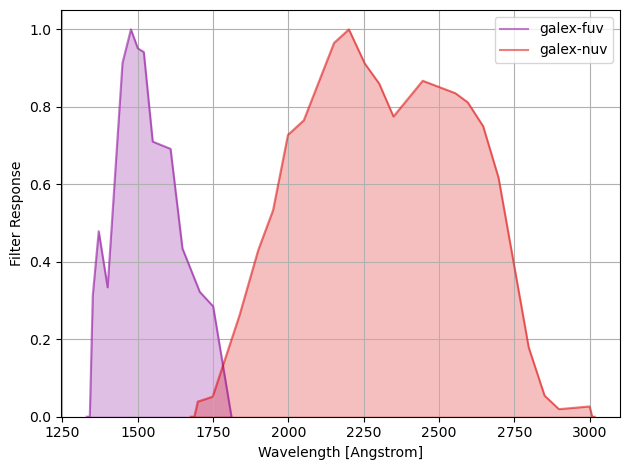

In [36]:
filtinfo = {}
for band, eazynum in zip(['fuv', 'nuv'], [120, 121]):
    filtinfo[band] = [eazynum]
    
write_speclite_filters(filtinfo, group_name='galex')
filt = specfilters.load_filters('galex-fuv', 'galex-nuv')
specfilters.plot_filters(filt) #wavelength_limits=(3900, 9500), 
                         #response_limits=(0, 1.7), legend_ncols=3,
                         #legend_loc='upper right')
plt.tight_layout()
plt.savefig('galex.png')

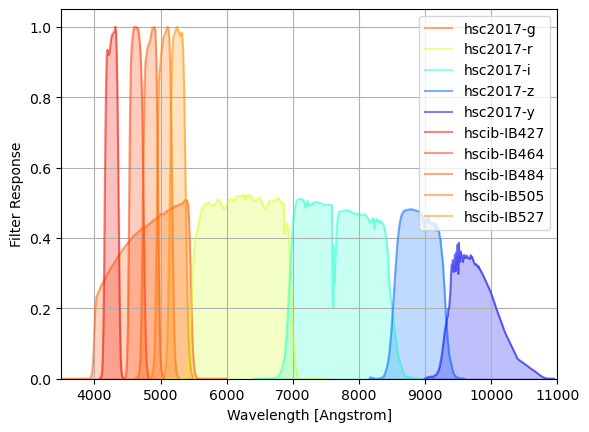

In [12]:
from speclite import filters as specfilters

ib = subarufilters.copy()
[ib.pop(band) for band in ['g', 'r', 'i', 'z']]
write_speclite_filters(ib, group_name='hscib')

filt = specfilters.load_filters('hsc2017-*', 'hscib-IB427', 'hscib-IB464', 'hscib-IB484', 'hscib-IB505', 'hscib-IB527')
specfilters.plot_filters(filt, wavelength_limits=(3500, 11000), cmap='jet_r')
#plt.savefig('desi2-filters.png')    

In [13]:
subarufilters

{'g': [314],
 'r': [315],
 'i': [316],
 'z': [317],
 'IB427': [181],
 'IB464': [183],
 'IB484': [184],
 'IB505': [185],
 'IB527': [186]}